In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Data Cleaning and Merging CSVs**

In [ ]:
!unzip ../../../data/riderhsip/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop.zip -d mbta_ridership


Archive:  /content/drive/MyDrive/CS506/data/riderhsip/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop.zip
   creating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/
  inflating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2016.csv  
  inflating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2017.csv  
  inflating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2018.csv  
  inflating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2019.csv  
  inflating: mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2020.csv  
  inflating: mbta_ridership/MBTA_Bus_Ridershi

In [3]:
!ls mbta_ridership | head -20


MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop


In [ ]:

df16 = pd.read_csv("mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2016.csv")

print(df16.shape)       # rows, columns
print(df16.columns)     # list of column names
print(df16.head())      # first 5 rows

(859425, 14)
Index(['season', 'route_id', 'route_variant', 'direction_id',
       'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name',
       'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_',
       'sample_size'],
      dtype='object')
      season route_id route_variant  direction_id trip_start_time  \
0  Fall 2016        1         1-0-0             0        04:37:00   
1  Fall 2016        1         1-0-0             0        04:37:00   
2  Fall 2016        1         1-0-0             0        04:37:00   
3  Fall 2016        1         1-0-0             0        04:37:00   
4  Fall 2016        1         1-0-0             0        04:37:00   

   day_type_id day_type_name                      stop_name  stop_id  \
0  day_type_01       weekday   WASHINGTON ST OPP RUGGLES ST        1   
1  day_type_01       weekday       ALBANY ST OPP RANDALL ST    10003   
2  day_type_01       weekday  MASSACHUSETTS AVE @ SIDNEY ST      101   
3  day_type_01       weekday   MASS

/tmp/ipython-input-2409556264.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df16 = pd.read_csv("/content/mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2016.csv")


In [5]:
import glob

files = glob.glob("mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/*.csv")
print("Total files found:", len(files))


Total files found: 10


In [8]:
import pandas as pd

columns_per_file = {}

for f in files:
    try:
        # read  the header row
        cols = list(pd.read_csv(f, nrows=0).columns)
        columns_per_file[f.split('/')[-1]] = cols
    except Exception as e:
        print(f"Error reading {f}: {e}")

# summary of cols
for name, cols in columns_per_file.items():
    print(f"\n{name} -> {len(cols)} columns")
    print(cols)



MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2018.csv -> 14 columns
['season', 'route_id', 'route_variant', 'direction_id', 'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name', 'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_', 'sample_size']

MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Spring_2024.csv -> 14 columns
['season', 'route_id', 'route_variant', 'direction_id', 'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name', 'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_', 'sample_size']

MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2022.csv -> 14 columns
['season', 'route_id', 'route_variant', 'direction_id', 'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name', 'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_', 'sample_size']

MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2020.csv -> 14 columns
['season', 'route_id', 'route_variant', 'direction_id', 'trip_start_t

In [9]:
#renaming some cols
rename_map_2024 = {
    'load': 'load_',
    'sample_count': 'sample_size'
}

# removing cols we dont need
drop_cols_2024 = ['mode', 'year', 'time_period_id', 'time_period_name']

df_2024 = pd.read_csv("mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2024.csv")
df_2024 = df_2024.rename(columns=rename_map_2024).drop(columns=drop_cols_2024)


/tmp/ipython-input-1247026183.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv("mbta_ridership/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop/MBTA_Bus_Ridership_by_Trip_Season_Route_Line_and_Stop_Fall_2024.csv")


In [10]:
print(sorted(df_2024.columns))
print(sorted(df16.columns))  #


['alightings', 'boardings', 'day_type_id', 'day_type_name', 'direction_id', 'load_', 'route_id', 'route_variant', 'sample_size', 'season', 'stop_id', 'stop_name', 'stop_sequence', 'trip_start_time']
['alightings', 'boardings', 'day_type_id', 'day_type_name', 'direction_id', 'load_', 'route_id', 'route_variant', 'sample_size', 'season', 'stop_id', 'stop_name', 'stop_sequence', 'trip_start_time']


In [11]:
# function to load and clean data

def load_and_clean(filepath):
    df = pd.read_csv(filepath)

    #  column names
    df.columns = df.columns.str.strip().str.lower()

    #route_id is a string
    df['route_id'] = df['route_id'].astype(str).str.strip()

    # Fix extended-hour times like 24:30:00, 25:10:00 → 00:30:00, 01:10:00 (want the max to be 24 hours)
    def normalize_time(t):
        try:
            h, m, s = map(int, t.split(":"))
            if h >= 24:
                h -= 24
            return f"{h:02d}:{m:02d}:{s:02d}"
        except:
            return None

    df['trip_start_time_fixed'] = df['trip_start_time'].astype(str).apply(normalize_time)

    # create hour col from start time
    df['hour'] = pd.to_datetime(df['trip_start_time_fixed'], format="%H:%M:%S", errors='coerce').dt.hour


    df['file_source'] = filepath.split("/")[-1]
    df['year'] = df['file_source'].str.extract(r'_(20\d{2})')
    df['season'] = df['file_source'].str.extract(r'_(Fall|Spring)')

    return df


In [12]:
dfs = [load_and_clean(f) for f in files]
df_all = pd.concat(dfs, ignore_index=True)
print("Merged shape:", df_all.shape)


/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-input-743145739.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/tmp/ipython-inp

Merged shape: (7879638, 23)


In [13]:
print(df_all['year'].value_counts().sort_index())
print(df_all['season'].value_counts())
print(df_all['route_id'].nunique(), "unique routes")
print(df_all['hour'].min(), df_all['hour'].max(), "hour ranges")
print(df_all['hour'].isna().sum(), "missing hours")


year
2016     859425
2017     864425
2018     864842
2019     863040
2020     854771
2021     848112
2022     809775
2023     783333
2024    1131915
Name: count, dtype: int64
season
Fall      7522149
Spring     357489
Name: count, dtype: int64
173 unique routes
0 23 hour ranges
0 missing hours


In [14]:
df_all.columns

Index(['season', 'route_id', 'route_variant', 'direction_id',
       'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name',
       'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_',
       'sample_size', 'trip_start_time_fixed', 'hour', 'file_source', 'year',
       'mode', 'time_period_id', 'time_period_name', 'load', 'sample_count'],
      dtype='object')

In [ ]:
df_all.to_csv("../../../data/riderhsip/cleaned_mbta_ridership_2016_2024.csv", index=False)

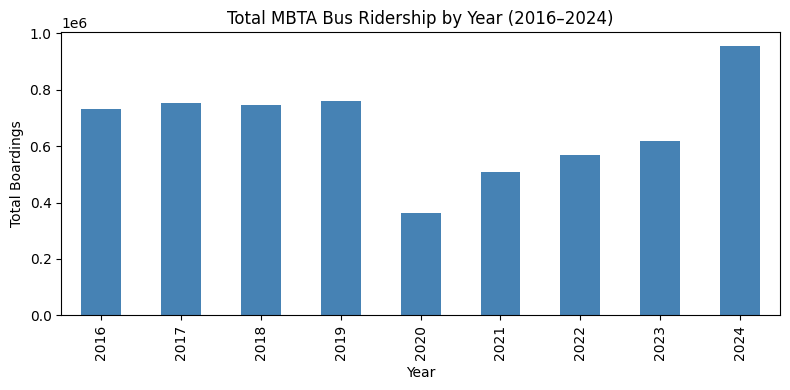

In [15]:
# looking at total boardings of all routes by year
ridership_by_year = df_all.groupby('year')['boardings'].sum()
ridership_by_year.plot(kind='bar', color='steelblue', figsize=(8,4))
plt.title("Total MBTA Bus Ridership by Year (2016–2024)")
plt.ylabel("Total Boardings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


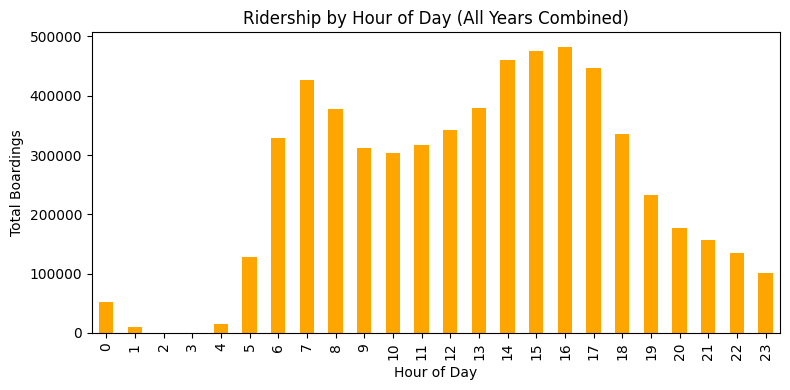

In [ ]:
ridership_by_hour = df_all.groupby('hour')['boardings'].sum()
ridership_by_hour.plot(kind='bar', color='orange', figsize=(8,4))
plt.title("Ridership by Hour of Day (All Years Combined)")
plt.ylabel("Total Boardings")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


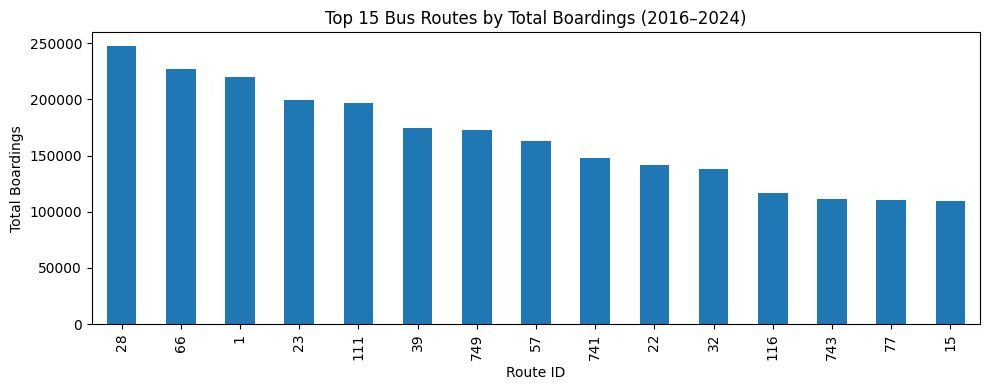

In [ ]:
top_routes = (
    df_all.groupby('route_id')['boardings']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
top_routes.plot(kind='bar', figsize=(10,4))
plt.title("Top 15 Bus Routes by Total Boardings (2016–2024)")
plt.ylabel("Total Boardings")
plt.xlabel("Route ID")
plt.tight_layout()
plt.show()


In [ ]:
df_all['day_type_name'].unique()


array(['weekday', 'saturday', 'sunday'], dtype=object)

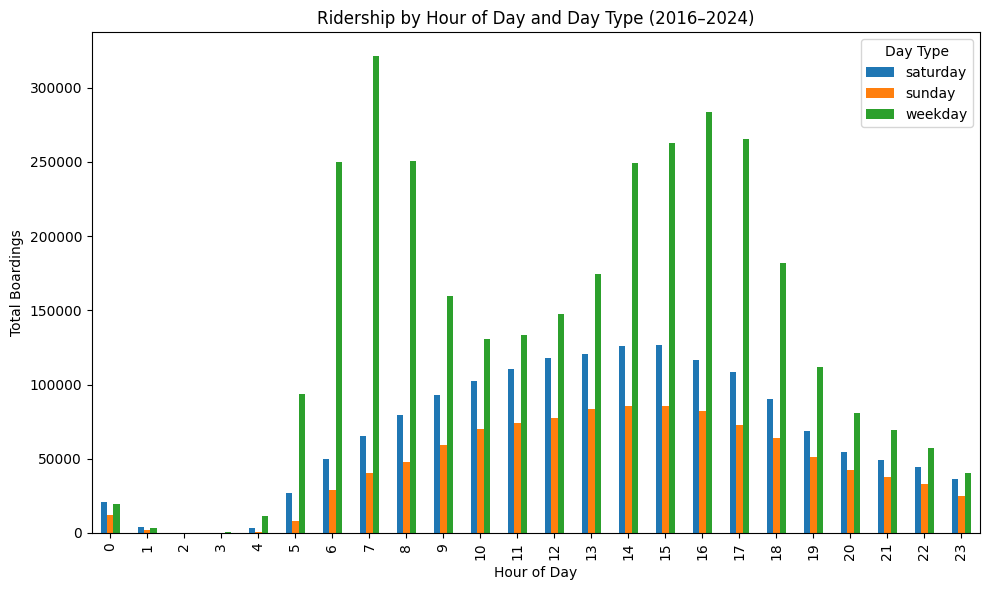

In [ ]:
ridership_by_hour_daytype = (
    df_all.groupby(['hour', 'day_type_name'])['boardings']
    .sum()
    .unstack(fill_value=0)
)

ridership_by_hour_daytype.plot(kind='bar', figsize=(10, 6))
plt.title('Ridership by Hour of Day and Day Type (2016–2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Boardings')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3474752700.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['boardings'] * x['sample_size']).sum() / x['sample_size'].sum())


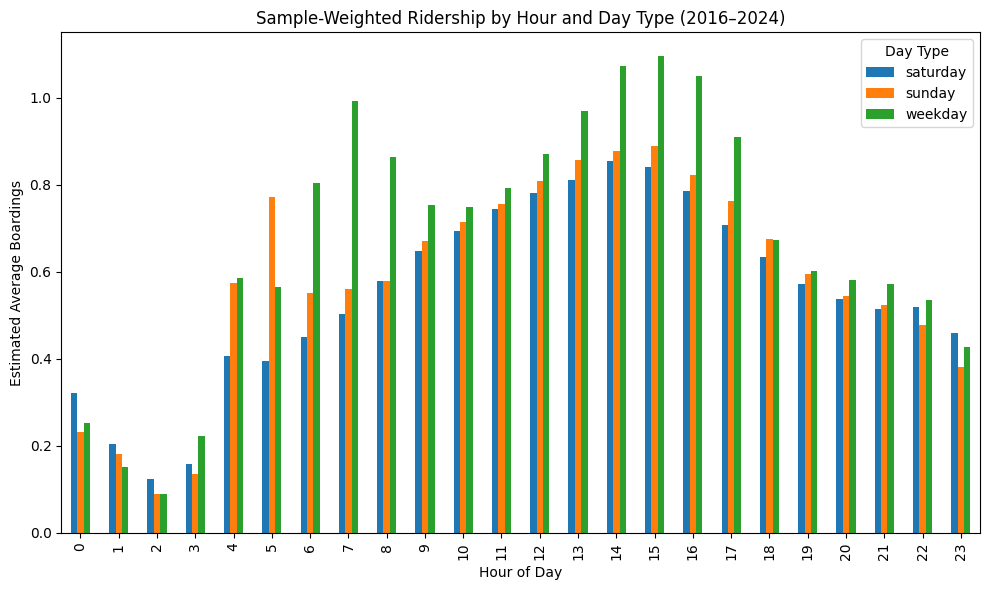

In [ ]:
#4 going to scale by sample size to make sure trends are the same (since some routes are more sampled than others)
weighted_ridership = (
    df_all.groupby(['hour', 'day_type_name'])
    .apply(lambda x: (x['boardings'] * x['sample_size']).sum() / x['sample_size'].sum())
    .unstack(fill_value=0)
)

weighted_ridership.plot(kind='bar', figsize=(10, 6))
plt.title('Sample-Weighted Ridership by Hour and Day Type (2016–2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Average Boardings')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


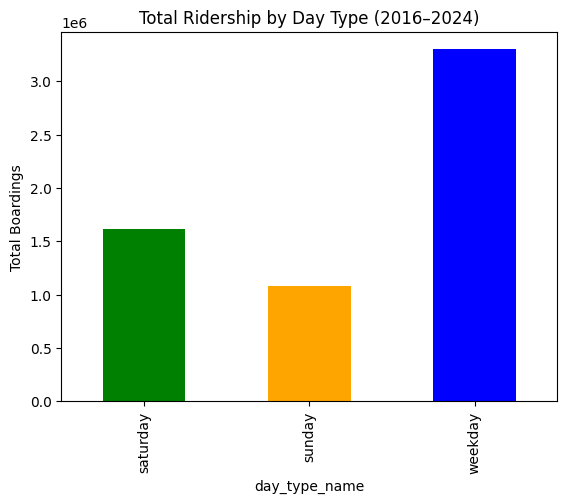

In [ ]:
df_all.groupby('day_type_name')['boardings'].sum().plot(kind='bar', color=['green','orange','blue'])
plt.title('Total Ridership by Day Type (2016–2024)')
plt.ylabel('Total Boardings')
plt.show()


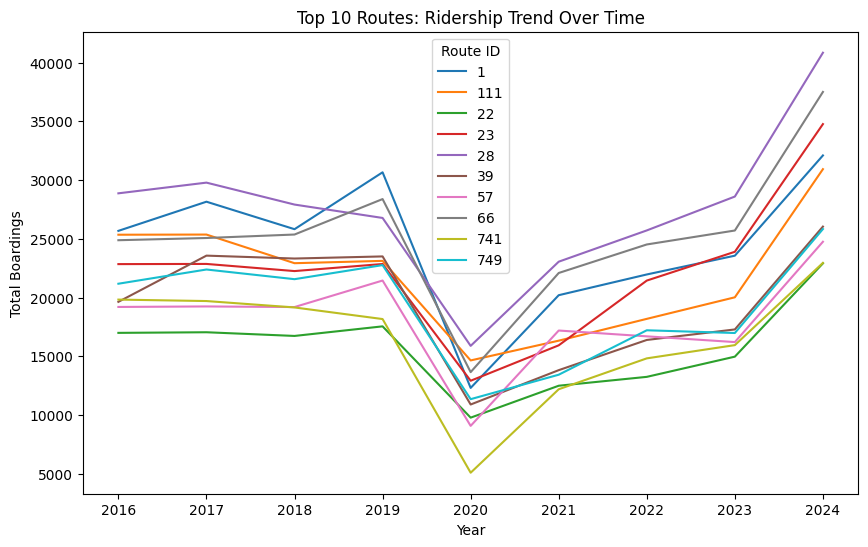

In [ ]:
top_routes = df_all.groupby('route_id')['boardings'].sum().nlargest(10).index
ridership_by_route_year = (
    df_all[df_all['route_id'].isin(top_routes)]
    .groupby(['year', 'route_id'])['boardings']
    .sum()
    .unstack()
)
ridership_by_route_year.plot(figsize=(10,6))
plt.title('Top 10 Routes: Ridership Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Boardings')
plt.legend(title='Route ID')
plt.show()


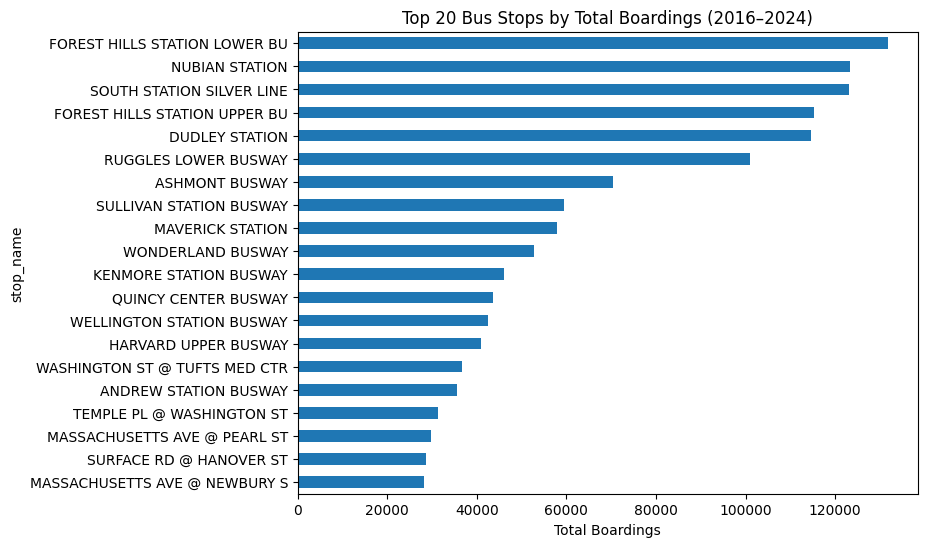

In [ ]:
# buisuiest stops based on boardings
stop_ridership = (
    df_all.groupby('stop_name')['boardings'].sum()
    .sort_values(ascending=False)
    .head(20)
)
stop_ridership.plot(kind='barh', figsize=(8,6))
plt.title('Top 20 Bus Stops by Total Boardings (2016–2024)')
plt.xlabel('Total Boardings')
plt.gca().invert_yaxis()
plt.show()


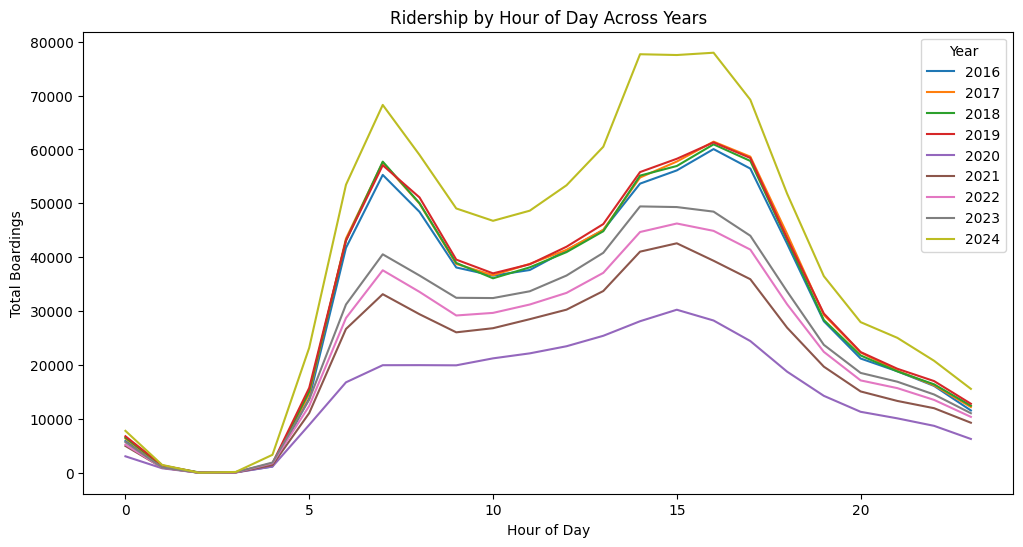

In [ ]:
hourly_year = (
    df_all.groupby(['year', 'hour'])['boardings']
    .sum()
    .unstack(fill_value=0)
    .T  # gonna transpose because it looks better in plot
)
hourly_year.plot(figsize=(12,6))
plt.title('Ridership by Hour of Day Across Years')
plt.xlabel('Hour of Day')
plt.ylabel('Total Boardings')
plt.legend(title='Year')
plt.show()


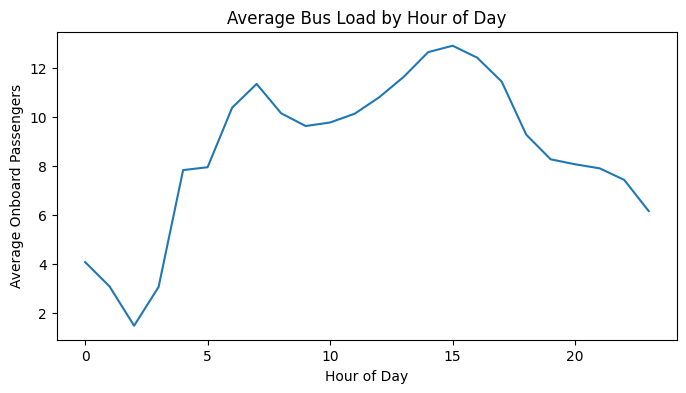

In [ ]:
df_all.groupby('hour')['load_'].mean().plot(figsize=(8,4))
plt.title('Average Bus Load by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Onboard Passengers')
plt.show()


In [ ]:
# load heatmap

# Focus on top 15 busiest routes (by total boardings)
top_routes = (
    df_all.groupby('route_id')['boardings']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Cmean load by hour for those routes
load_heatmap = (
    df_all[df_all['route_id'].isin(top_routes)]
    .groupby(['route_id', 'hour'])['load_']
    .mean()
    .unstack(fill_value=0)
)

# Sort routes by total average load for cleaner display
load_heatmap = load_heatmap.loc[load_heatmap.mean(axis=1).sort_values(ascending=False).index]


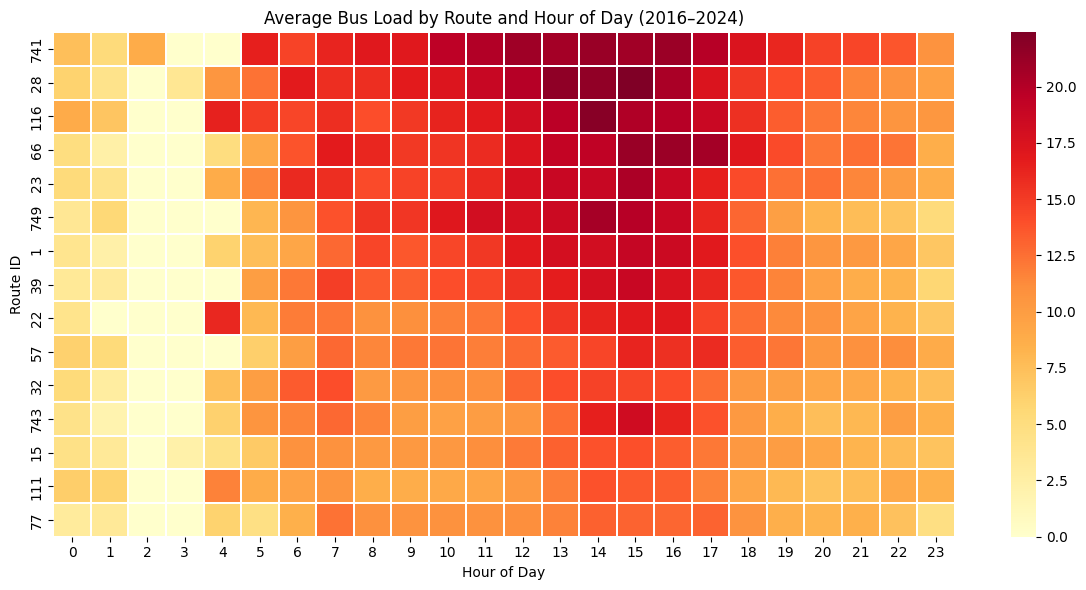

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(load_heatmap, cmap='YlOrRd', linewidths=0.3)
plt.title('Average Bus Load by Route and Hour of Day (2016–2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Route ID')
plt.tight_layout()
plt.show()
